# Esercitazione 6

Ho modificato significativamente il codice fornito, aggiungendo l'algoritmo di Metropolis e il metodo di Gibbs in _Measure_. Inoltre, ho inserito la possibilità di ripartire da una configurazione precedente. Sfrutto questa opzione nelle simulazioni che ho eseguito, anzichè generare casualmente nuove configurazioni volta, così da avere una configurazione sempre equilibrata.

Calcolo $U,C, \chi, M$ utilizzando sia l'algoritmo di Metropolis (M) che il metodo di Gibbs (G). 
Di seguito rappresento l'andamento di tali grandezze in funzione della temperatura, che va da 0.5 K a 2 K. Con lo script _runall.py_ si eseguono tutte e 4 le simulazioni e i risultati vengono spostati nella cartella _results_. 

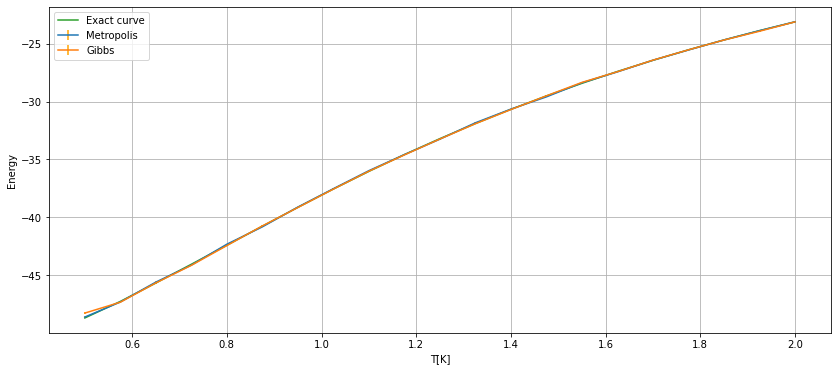

In [51]:
import numpy as np
import matplotlib.pyplot as plt

T, UM, stdev_UM = np.loadtxt("es6/results/uM.out", usecols=(0,1,2), delimiter=',', unpack='true')
T, UG, stdev_UG = np.loadtxt("es6/results/uG.out", usecols=(0,1,2), delimiter=',', unpack='true')

plt.figure(figsize=(14,6))

plt.errorbar(T,UM,yerr=stdev_UM, marker='', ecolor='orange', label ='Metropolis')
plt.errorbar(T,UG,yerr=stdev_UG, marker='', ecolor='orange', label ='Gibbs')

beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e*Ns, label = 'Exact curve')

plt.xlabel('T[K]')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

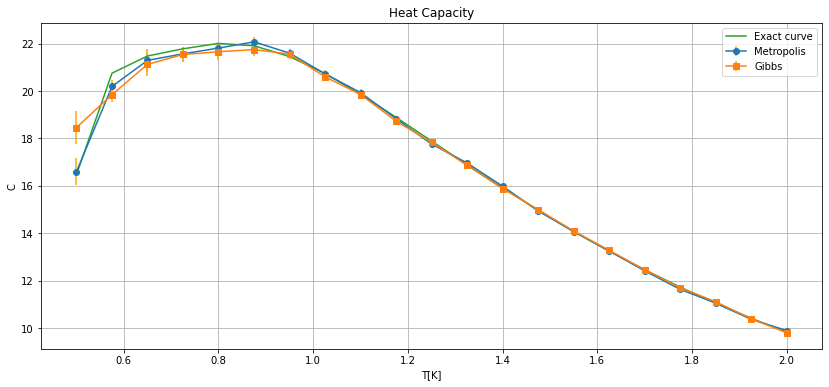

In [52]:
T, CM, stdev_CM = np.loadtxt("es6/results/cM.out", usecols=(0,1,2), delimiter=',', unpack='true')
T, CG, stdev_CG = np.loadtxt("es6/results/cG.out", usecols=(0,1,2), delimiter=',', unpack='true')

plt.figure(figsize=(14,6))
plt.errorbar(T,CM,yerr=stdev_CM, marker='o', ecolor='orange', label ='Metropolis')
plt.errorbar(T,CG,yerr=stdev_CG, marker='s', ecolor='orange', label ='Gibbs')

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat*Ns, label = 'Exact curve')

plt.title('Heat Capacity')
plt.xlabel('T[K]')
plt.ylabel('C')
plt.grid(True)
plt.legend()
plt.show()

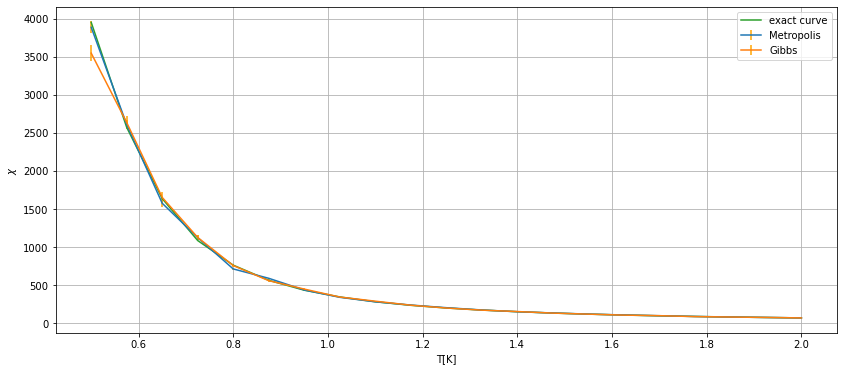

In [53]:
T, XM, stdev_XM = np.loadtxt("es6/results/xM.out", usecols=(0,1,2), delimiter=',', unpack='true')
T, XG, stdev_XG = np.loadtxt("es6/results/xG.out", usecols=(0,1,2), delimiter=',', unpack='true')

plt.figure(figsize=(14,6))
plt.errorbar(T,XM,yerr=stdev_XM, marker='', ecolor='orange', label ='Metropolis')
plt.errorbar(T,XG,yerr=stdev_XG, marker='', ecolor='orange', label ='Gibbs')

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X*Ns, label ="exact curve")

plt.xlabel('T[K]')
plt.ylabel(r'$\chi$')
plt.grid(True)
plt.legend()
plt.show()

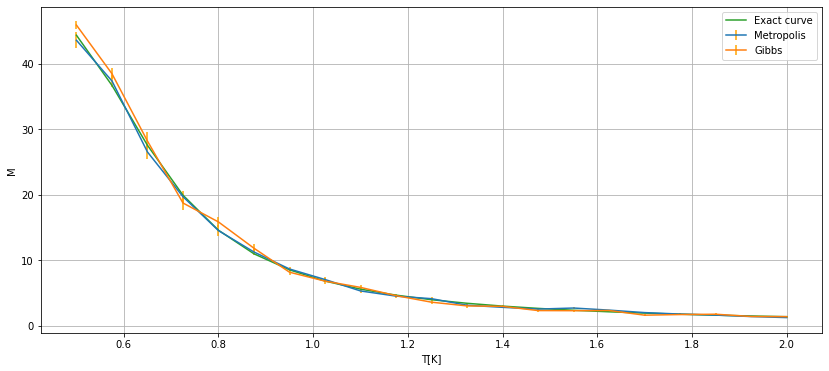

In [55]:
#now h=0.02, compute the magnetization of the system

T, MM, stdev_MM = np.loadtxt("es6/results/mM.out", usecols=(0,1,2), delimiter=',', unpack='true')
T, MG, stdev_MG = np.loadtxt("es6/results/mG.out", usecols=(0,1,2), delimiter=',', unpack='true')

plt.figure(figsize=(14,6))
plt.errorbar(T,MM,yerr=stdev_MM, marker='', ecolor='orange', label ='Metropolis')
plt.errorbar(T,MG,yerr=stdev_MG, marker='', ecolor='orange', label ='Gibbs')

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M*Ns, label = 'Exact curve')

plt.xlabel('T[K]')
plt.ylabel('M')
plt.grid(True)
plt.legend()
plt.show()

Noto un ottimo accordo tra la curva esatta e la simulazione utilizzando i due tipi di algoritmi. Le incertezze, calcolate con data blocking, risultano essere molto basse per ogni grandezza, in entrambi gli algoritmi. Di seguito confronto le incertezze ottenute con i due diversi algoritmi; risultano essere molto simili, ma a basse T sembra essere lievemente superiore quella ottenuta calcolando le grandezze con il metodo di Gibbs.

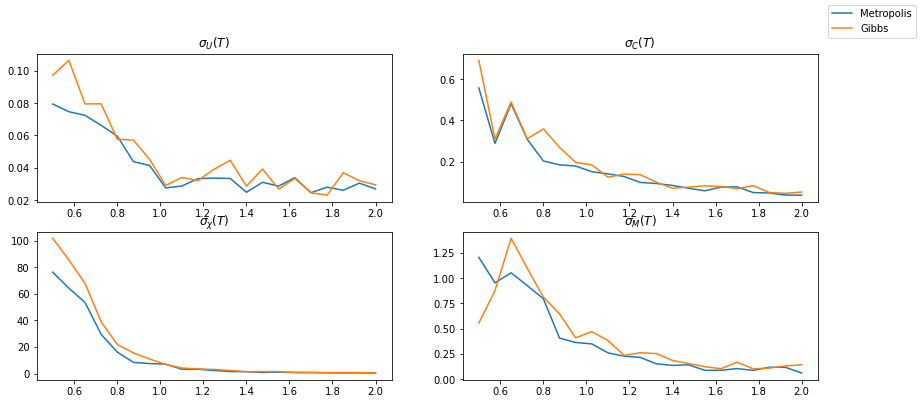

In [143]:
import matplotlib
#fig, axs = plt.subplots(2, 2,)

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_title(r"$\sigma_U (T)$")
ax1.plot(T, stdev_UM)
ax1.plot(T, stdev_UG)
ax2.set_title(r"$\sigma_C (T)$")
ax2.plot(T, stdev_CM)
ax2.plot(T, stdev_CG)
ax3.set_title(r"$\sigma_{\chi} (T)$")
ax3.plot(T, stdev_XM)
ax3.plot(T, stdev_XG)
ax4.set_title(r"$\sigma_M (T)$")
ax4.plot(T, stdev_MM, label = 'Metropolis')
ax4.plot(T, stdev_MG, label = 'Gibbs')

fig.legend()